<a href="https://colab.research.google.com/github/keita-h/plant_village_Class/blob/main/plant_village.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
!pip install -q tensorflow_datasets
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
!pip install java

ERROR: Could not find a version that satisfies the requirement java (from versions: none)
ERROR: No matching distribution found for java


In [ ]:
cd /content/drive/My Drive/Colab Notebooks


/content/drive/My Drive/Colab Notebooks


In [ ]:
!ls

'imagenette.ipynb のコピー'   TensorFlow	  train.csv
 imagewang.ipynb	      test.csv		  Untitled0.ipynb
 plant_village.ipynb	      titanic_train.csv   侍


In [ ]:
!jupyter nbconvert --to python plant_village.ipynb

[NbConvertApp] Converting notebook plant_village.ipynb to python
[NbConvertApp] Writing 3497 bytes to plant_village.py


In [ ]:
dataset=tfds.load('plant_village',split=['train'])

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/plant_village/1.0.0.incomplete92LIWS/plant_village-train.tfrecord


Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.0. Subsequent calls will reuse this data.


In [ ]:
dataset

[<DatasetV1Adapter shapes: {image: (None, None, 3), image/filename: (), label: ()}, types: {image: tf.uint8, image/filename: tf.string, label: tf.int64}>]

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

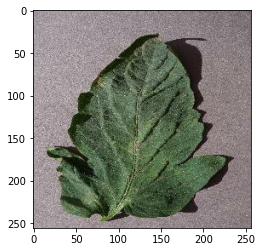

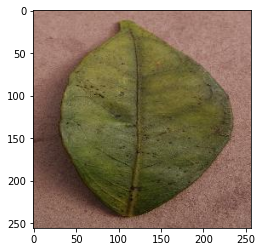

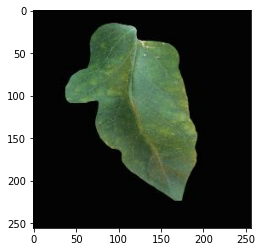

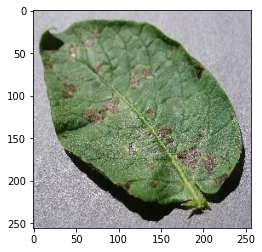

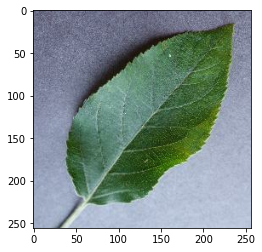

In [ ]:
for i in dataset[0].take(5):
    a=i['image']
    plt.imshow(tf.image.resize_with_pad(a,256,256,method='nearest'))
    plt.show()

In [ ]:
def edit_dataset(data):
    return tf.image.resize_with_pad(data['image'],256,256,method='nearest'),data['label']
dataset_edit=dataset[0].map(edit_dataset)

In [ ]:
dataset_edit

<DatasetV1Adapter shapes: ((256, 256, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
train_ds=dataset_edit.take(38012)
val_ds=dataset_edit.skip(38012).take(8146)
test_ds=dataset_edit.skip(46158)

In [ ]:
test_ds

<DatasetV1Adapter shapes: ((256, 256, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,GlobalMaxPooling2D,Dense,Dropout,SeparableConvolution2D,LeakyReLU,SpatialDropout2D

In [ ]:
model=Sequential()
model.add(Conv2D(32,3,activation='relu',padding='same',input_shape=(256,256,3)))
model.add(LeakyReLU())
model.add(Conv2D(32,5,activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(LeakyReLU())
model.add(Conv2D(64,5,activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(LeakyReLU())
model.add(Conv2D(128,5,activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D())
model.add(SpatialDropout2D(0.5))
model.add(Conv2D(256,3,activation='relu',padding='same'))
model.add(LeakyReLU())
model.add(Conv2D(256,5,activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D())
model.add(Conv2D(512,3,activation='relu',padding='same'))
model.add(LeakyReLU())
model.add(Conv2D(512,5,activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D())
model.add(Conv2D(1024,3,activation='relu',padding='same'))
model.add(LeakyReLU())
model.add(Conv2D(1024,5,activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D())
model.add(GlobalMaxPooling2D())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(LeakyReLU())
model.add(Dense(256,kernel_initializer='he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('swish'))
model.add(Dense(128,activation='relu'))
model.add(LeakyReLU())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("swish"))
model.add(Dense(40,activation='relu'))
model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(38,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      1

In [ ]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
b_size=64
model.fit(
    train_ds.batch(b_size),
    validation_data=val_ds.batch(b_size),
    epochs=100,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(patience=10),
               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=0.0001, min_delta=0.01, verbose=1),
    ]
)

Epoch 1/100
594/594 [==============================] - 775s 1s/step - loss: 2.9706 - accuracy: 0.2213 - val_loss: 2.8837 - val_accuracy: 0.2227 - lr: 0.0010
Epoch 2/100
594/594 [==============================] - 770s 1s/step - loss: 2.4631 - accuracy: 0.3344 - val_loss: 2.1056 - val_accuracy: 0.4027 - lr: 0.0010
Epoch 3/100
594/594 [==============================] - 768s 1s/step - loss: 1.9869 - accuracy: 0.4395 - val_loss: 1.8047 - val_accuracy: 0.4801 - lr: 0.0010
Epoch 4/100
594/594 [==============================] - 767s 1s/step - loss: 1.6503 - accuracy: 0.5202 - val_loss: 1.6134 - val_accuracy: 0.5117 - lr: 0.0010
Epoch 5/100
594/594 [==============================] - 766s 1s/step - loss: 1.3933 - accuracy: 0.5878 - val_loss: 1.3981 - val_accuracy: 0.5778 - lr: 0.0010
Epoch 6/100
594/594 [==============================] - 766s 1s/step - loss: 1.1913 - accuracy: 0.6474 - val_loss: 1.0539 - val_accuracy: 0.6780 - lr: 0.0010
Epoch 7/100
594/594 [==============================] - 765